In [1]:
import sys
import os
sys.path.append(os.path.join(os.path.abspath(''), '../'))
from matplotlib import pyplot as plt

from dataset.data_loader import DataLoader, playtime_forever_users_games_edge_scoring_function, liked_interactions_edge_scoring_function, LinearNormalizer, GaussianNormalizer, PercentileNormalizer, get_games_for_user, never_remove_edge, remove_zero_playtime_edge

In [2]:
# Testing the different normalization functions
user = 76561198362779781

test_data_loader = DataLoader(num_users_to_load_per_snowball=100, cache_local_dataset=True, score_normalizers = [LinearNormalizer(0.0, 1.0)])
print('Constant with linear norm applied')
display(get_games_for_user(test_data_loader, user))
print()

test_data_loader = DataLoader(num_users_to_load_per_snowball=100, cache_local_dataset=True, users_games_edge_scoring_function = playtime_forever_users_games_edge_scoring_function, score_normalizers = [], user_game_edge_embeddings = ['playtime_forever'])
print('No norm')
display(get_games_for_user(test_data_loader, user))
print()

test_data_loader = DataLoader(num_users_to_load_per_snowball=100, cache_local_dataset=True, users_games_edge_scoring_function = playtime_forever_users_games_edge_scoring_function, score_normalizers = [LinearNormalizer(0.0, 1.0)], user_game_edge_embeddings = ['playtime_forever'])
print('Linear norm')
display(get_games_for_user(test_data_loader, user))
print()

test_data_loader = DataLoader(num_users_to_load_per_snowball=100, cache_local_dataset=True, users_games_edge_scoring_function = playtime_forever_users_games_edge_scoring_function, score_normalizers = [GaussianNormalizer(1.0, 1.0)], user_game_edge_embeddings = ['playtime_forever'])
print('Gaussian norm')
display(get_games_for_user(test_data_loader, user))
print()

test_data_loader = DataLoader(num_users_to_load_per_snowball=100, cache_local_dataset=True, users_games_edge_scoring_function = playtime_forever_users_games_edge_scoring_function, score_normalizers = [PercentileNormalizer()], user_game_edge_embeddings = ['playtime_forever'])
print('Percentile norm')
display(get_games_for_user(test_data_loader, user))
print()

test_data_loader = DataLoader(num_users_to_load_per_snowball=100, cache_local_dataset=True, users_games_edge_scoring_function = playtime_forever_users_games_edge_scoring_function, score_normalizers = [LinearNormalizer(0.0, 1.0), GaussianNormalizer(1.0, 1.0)], user_game_edge_embeddings = ['playtime_forever'])
print('Linear then gaussian')
display(get_games_for_user(test_data_loader, user))
print()

test_data_loader = DataLoader(num_users_to_load_per_snowball=100, cache_local_dataset=True, users_games_edge_scoring_function = playtime_forever_users_games_edge_scoring_function, score_normalizers = [PercentileNormalizer(), GaussianNormalizer(1.0, 1.0)], user_game_edge_embeddings = ['playtime_forever'])
print('percentile then gaussian')
display(get_games_for_user(test_data_loader, user))
print()

Constant with linear norm applied


,user_id,game_id,source,score
22753495,76561198362779781,550,local,NaN
22753496,76561198362779781,230410,local,NaN
22753497,76561198362779781,242760,local,NaN
22753498,76561198362779781,271590,local,NaN
22753499,76561198362779781,730,local,NaN
22753500,76561198362779781,939400,local,NaN
22753501,76561198362779781,1172470,local,NaN
22753502,76561198362779781,1238810,local,NaN
22753503,76561198362779781,1483870,local,NaN
22753504,76561198362779781,1222670,local,NaN



No norm


,user_id,game_id,playtime_forever,source,score
22753495,76561198362779781,550,57,local,57.0
22753496,76561198362779781,230410,217,local,217.0
22753497,76561198362779781,242760,15,local,15.0
22753498,76561198362779781,271590,4401,local,4401.0
22753499,76561198362779781,730,796,local,796.0
22753500,76561198362779781,939400,271,local,271.0
22753501,76561198362779781,1172470,0,local,0.0
22753502,76561198362779781,1238810,44,local,44.0
22753503,76561198362779781,1483870,653,local,653.0
22753504,76561198362779781,1222670,0,local,0.0



Linear norm


,user_id,game_id,playtime_forever,source,score
22753495,76561198362779781,550,57,local,0.007365
22753496,76561198362779781,230410,217,local,0.028040
22753497,76561198362779781,242760,15,local,0.001938
22753498,76561198362779781,271590,4401,local,0.568678
22753499,76561198362779781,730,796,local,0.102856
22753500,76561198362779781,939400,271,local,0.035017
22753501,76561198362779781,1172470,0,local,0.000000
22753502,76561198362779781,1238810,44,local,0.005685
22753503,76561198362779781,1483870,653,local,0.084378
22753504,76561198362779781,1222670,0,local,0.000000



Gaussian norm


,user_id,game_id,playtime_forever,source,score
22753495,76561198362779781,550,57,local,0.505240
22753496,76561198362779781,230410,217,local,0.569429
22753497,76561198362779781,242760,15,local,0.488391
22753498,76561198362779781,271590,4401,local,2.247950
22753499,76561198362779781,730,796,local,0.801710
22753500,76561198362779781,939400,271,local,0.591092
22753501,76561198362779781,1172470,0,local,0.482373
22753502,76561198362779781,1238810,44,local,0.500025
22753503,76561198362779781,1483870,653,local,0.744341
22753504,76561198362779781,1222670,0,local,0.482373



Percentile norm


,user_id,game_id,playtime_forever,source,score
22753495,76561198362779781,550,57,local,0.454545
22753496,76561198362779781,230410,217,local,0.545455
22753497,76561198362779781,242760,15,local,0.272727
22753498,76561198362779781,271590,4401,local,0.909091
22753499,76561198362779781,730,796,local,0.818182
22753500,76561198362779781,939400,271,local,0.636364
22753501,76561198362779781,1172470,0,local,0.136364
22753502,76561198362779781,1238810,44,local,0.363636
22753503,76561198362779781,1483870,653,local,0.727273
22753504,76561198362779781,1222670,0,local,0.136364



Linear then gaussian


,user_id,game_id,playtime_forever,source,score
22753495,76561198362779781,550,57,local,0.505240
22753496,76561198362779781,230410,217,local,0.569429
22753497,76561198362779781,242760,15,local,0.488391
22753498,76561198362779781,271590,4401,local,2.247950
22753499,76561198362779781,730,796,local,0.801710
22753500,76561198362779781,939400,271,local,0.591092
22753501,76561198362779781,1172470,0,local,0.482373
22753502,76561198362779781,1238810,44,local,0.500025
22753503,76561198362779781,1483870,653,local,0.744341
22753504,76561198362779781,1222670,0,local,0.482373



percentile then gaussian


,user_id,game_id,playtime_forever,source,score
22753495,76561198362779781,550,57,local,0.697801
22753496,76561198362779781,230410,217,local,1.000000
22753497,76561198362779781,242760,15,local,0.093403
22753498,76561198362779781,271590,4401,local,2.208796
22753499,76561198362779781,730,796,local,1.906597
22753500,76561198362779781,939400,271,local,1.302199
22753501,76561198362779781,1172470,0,local,-0.359895
22753502,76561198362779781,1238810,44,local,0.395602
22753503,76561198362779781,1483870,653,local,1.604398
22753504,76561198362779781,1222670,0,local,-0.359895


In [2]:
# # Test that data loader works for live app
# test_data_loader = DataLoader(cache_local_dataset=False, get_local=True, get_external_database=True)
# test_data_loader.get_users_games_df_for_user(76561198090678973)

In [3]:
# Testing splits
test_data_loader = DataLoader(cache_local_dataset=True)
test_data_loader.load_random_edge_train_test_split()
test_data_loader.load_stratified_user_id_edge_train_test_split()

In [4]:
# Testing for the game embeddings
test_data_loader = DataLoader(num_users_to_load_per_snowball=10, cache_local_dataset=True, game_embeddings = ['name', 'numReviews', 'avgReviewScore', 'price', 'genres', 'tags', 'numFollowers'])
print(test_data_loader.games_df.head(20))

         id                             name  num_reviews  avg_review_score  \
0   1861610                   Endorphin Vice          261                62   
1   1533470                     TimeShifters          136                97   
2   1550820                     Quantum Echo            0                 0   
3   1305080                       GearBlocks          199                92   
4     29800                           Caster         3995                79   
5      4000                      Garry's Mod       978672                97   
6     17470                Dead Space (2008)        25342                92   
7     17390                           SPORE™        52617                92   
8      2590                      Alpha Prime         1390                55   
9     17440  SPORE™ Creepy & Cute Parts Pack         1703                89   
10    17460               Mass Effect (2007)        16085                94   
11     3590  Plants vs. Zombies GOTY Edition       1

In [5]:
# Print games df sorted by a field column
print(test_data_loader.games_df.sort_values(by='num_reviews', ascending=False).head(20)[['name', 'num_reviews']])

                                 name  num_reviews
310                  Counter-Strike 2      7927349
1308              PUBG: BATTLEGROUNDS      2315742
1407                           Dota 2      2186934
838                Grand Theft Auto V      1607919
69                           Terraria      1163231
3436  Tom Clancy's Rainbow Six® Siege      1155773
2089                  Team Fortress 2      1032680
5                         Garry's Mod       978672
339                              Rust       946430
3652                    Apex Legends™       800507
309                     Left 4 Dead 2       761990
988         The Witcher® 3: Wild Hunt       716118
2064                       ELDEN RING       694068
2771                 Dead by Daylight       673440
2053                         Among Us       658246
2084            ARK: Survival Evolved       646301
1367                   Cyberpunk 2077       635858
2300           Euro Truck Simulator 2       632214
1001                         PA

In [6]:
# Testing loading one snowball
print('All snowballs all users.')
test_data_loader = DataLoader(cache_local_dataset=True, snowballs_ids = [], num_users_to_load_per_snowball=None)
print('User Game Edges Shape: ', test_data_loader.users_games_df.shape)
print('Games Shape: ', test_data_loader.games_df.shape)
print('Users Shape: ', test_data_loader.users_df.shape)

print('1 snowball all users.')
test_data_loader = DataLoader(cache_local_dataset=True, snowballs_ids = ['76561198090678973'], num_users_to_load_per_snowball=None)
print('User Game Edges Shape: ', test_data_loader.users_games_df.shape)
print('Games Shape: ', test_data_loader.games_df.shape)
print('Users Shape: ', test_data_loader.users_df.shape)

print('all snowballs 100 users per snowball.')
test_data_loader = DataLoader(cache_local_dataset=True, snowballs_ids = [], num_users_to_load_per_snowball=100)
print('User Game Edges Shape: ', test_data_loader.users_games_df.shape)
print('Games Shape: ', test_data_loader.games_df.shape)
print('Users Shape: ', test_data_loader.users_df.shape)

All snowballs all users.
User Game Edges Shape:  (24182699, 3)
Games Shape:  (34088, 1)
Users Shape:  (79314, 1)
1 snowball all users.
User Game Edges Shape:  (16506325, 3)
Games Shape:  (33923, 1)
Users Shape:  (20000, 1)
all snowballs 100 users per snowball.
User Game Edges Shape:  (170620, 3)
Games Shape:  (34088, 1)
Users Shape:  (400, 1)


In [3]:
# Testing removing 0 playtime edges
print('No removing edges.')
test_data_loader = DataLoader(cache_local_dataset=True, remove_users_games_edges_function = never_remove_edge)
print('User Game Edges Shape: ', test_data_loader.users_games_df.shape)
print('Games Shape: ', test_data_loader.games_df.shape)
print('Users Shape: ', test_data_loader.users_df.shape)

print('Removing 0 playtime edges.')
test_data_loader = DataLoader(cache_local_dataset=True, remove_users_games_edges_function = remove_zero_playtime_edge, user_game_edge_embeddings = ['playtime_forever'])
print('User Game Edges Shape: ', test_data_loader.users_games_df.shape)
print('Games Shape: ', test_data_loader.games_df.shape)
print('Users Shape: ', test_data_loader.users_df.shape)

No removing edges.
df loads
removing
scoring
normalizing
User Game Edges Shape:  (24182699, 4)
Games Shape:  (34088, 1)
Users Shape:  (79314, 1)
Removing 0 playtime edges.
df loads
removing
scoring
normalizing
User Game Edges Shape:  (13031517, 5)
Games Shape:  (34088, 1)
Users Shape:  (79314, 1)


In [8]:
# # Scoring a user with no edges.
# data_loader = DataLoader(edge_scoring_function = playtime_forever_users_games_edge_scoring_function, user_game_edge_embeddings = ['playtime_forever'], score_normalizers = [GaussianNormalizer(1.0, 1.0)], remove_edge_function = remove_zero_playtime_edge, num_users_to_load_per_snowball = None)
# print_game_edges_for_user(data_loader, 76561199369782592)

In [2]:
test_data_loader = DataLoader(get_external_database=True, interactions_edge_scoring_function=liked_interactions_edge_scoring_function)
test_user = 76561198166465514
test_data_loader.get_interactions_df_for_user(test_user, preprocess=True)

,user_id,rec_model_name,game_id,time_spent,rec_model_save_path,user_liked,source,score
0,76561198166465514,random,1134040,2.340,test_random_model,True,external,1.0
1,76561198166465514,random,1158820,1.089,test_random_model,False,external,-1.0
2,76561198166465514,NaN,1337590,6.000,NaN,False,external,-1.0
3,76561198166465514,random,2086810,6.891,test_random_model,True,external,1.0
4,76561198166465514,random,2225610,1.692,test_random_model,True,external,1.0
5,76561198166465514,random,2402760,2.227,test_random_model,True,external,1.0
6,76561198166465514,random,267340,2.441,test_random_model,True,external,1.0
7,76561198166465514,random,378240,3.590,test_random_model,True,external,1.0
8,76561198166465514,random,536050,2.708,test_random_model,False,external,-1.0
9,76561198166465514,NaN,587790,20.143,NaN,False,external,-1.0


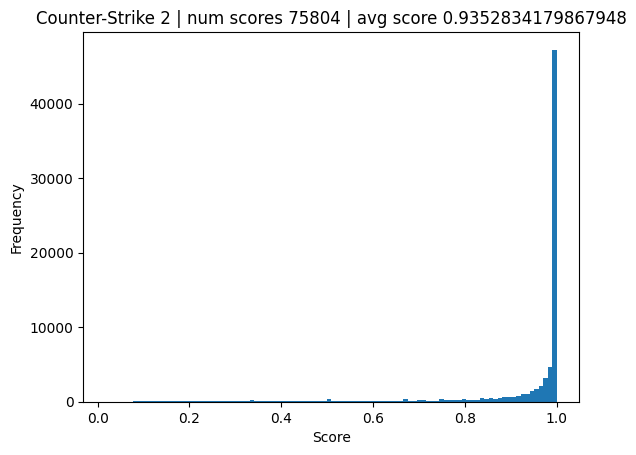

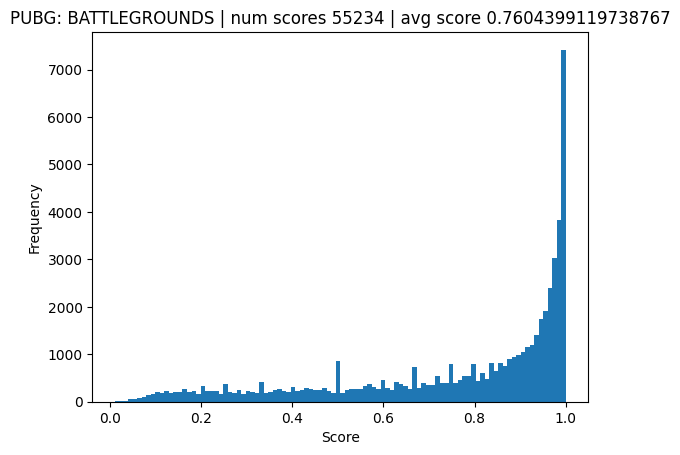

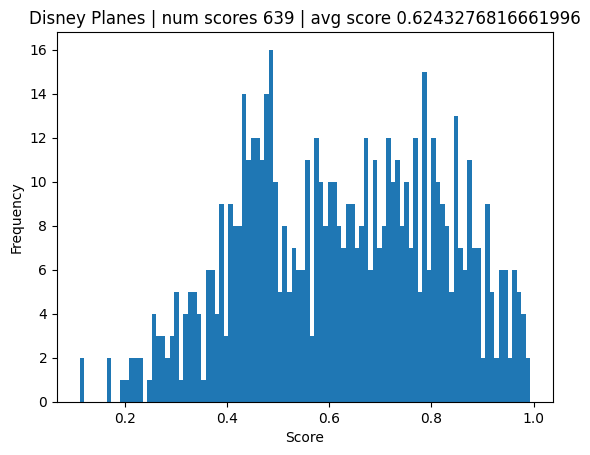

In [12]:
# test_data_loader = DataLoader(cache_local_dataset=True, users_games_edge_scoring_function = playtime_forever_users_games_edge_scoring_function, score_normalizers = [GaussianNormalizer(1.0, 1.0)], user_game_edge_embeddings = ['playtime_forever'], game_embeddings=['name'])
test_data_loader = DataLoader(cache_local_dataset=True, users_games_edge_scoring_function = playtime_forever_users_games_edge_scoring_function, score_normalizers = [PercentileNormalizer()], user_game_edge_embeddings = ['playtime_forever'], game_embeddings=['name'])
def get_score_information(game_name):
    game_id = test_data_loader.games_df.loc[test_data_loader.games_df['name'] == game_name, 'id']
    assert len(game_id) == 1, 'Not 1 game with game name.'
    game_id = game_id.iloc[0]
    scores = test_data_loader.users_games_df.loc[test_data_loader.users_games_df['game_id'] == game_id, 'score']
    scores = [score for score in scores if score > -10 and score < 10]
    plt.figure()
    plt.title(f'{game_name} | num scores {len(scores)} | avg score {sum(scores) / len(scores)}')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.hist(scores, bins=100)

get_score_information('Counter-Strike 2')
get_score_information('PUBG: BATTLEGROUNDS')
get_score_information('Disney Planes')